In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_assignment.csv')

In [3]:
#NEEDS CLARIFICATION
#Describe the dataset (e.g.: type of column, value range)
df.dtypes

Id                    int64
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [4]:
#How many records are there in the dataset?
df.shape

(149999, 13)

In [5]:
#checking for duplicates before everything else runs
df.duplicated().sum()


0

In [6]:
#just for testing
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [7]:
#How many locations does the dataset have? 
#Which location has the most job postings?
location_count = df['Location'].value_counts()
location_count

Sydney                                  46357
Melbourne                               35315
Brisbane                                16538
Perth                                    9913
Adelaide                                 4998
ACT                                      4816
Newcastle, Maitland & Hunter             3099
Gold Coast                               2758
South West Coast VIC                     1383
Mackay & Coalfields                      1316
Wollongong, Illawarra & South Coast      1302
Port Hedland, Karratha & Pilbara         1210
Sunshine Coast                           1188
Cairns & Far North                       1177
Northern QLD                             1105
Gosford & Central Coast                  1066
Toowoomba & Darling Downs                 986
Darwin                                    974
Hobart                                    756
Blue Mountains & Central West             716
Kalgoorlie, Goldfields & Esperance        650
Lismore & Far North Coast         

In [8]:
#How many job sectors(classification) are there in the data set?
#List the name of each sector and its' total job postings.
sector_counts=df['Classification'].value_counts()
sector_counts

Information & Communication Technology    16661
Trades & Services                         14125
Healthcare & Medical                      12515
Hospitality & Tourism                     11818
Manufacturing, Transport & Logistics       9608
Administration & Office Support            7636
Accounting                                 7075
Education & Training                       7033
Retail & Consumer Products                 6496
Sales                                      6281
Construction                               6254
Government & Defence                       5926
Engineering                                4812
Mining, Resources & Energy                 4679
Community Services & Development           3528
Banking & Financial Services               3481
Human Resources & Recruitment              3233
Call Centre & Customer Service             3127
Legal                                      3071
Marketing & Communications                 3052
Real Estate & Property                  

In [9]:
#Choose your favourite job sector, how many sub-sectors are there in that sector?
#List the name of each sub-sector and its' job posting number.
it_jobs = df[df['Classification'] == 'Information & Communication Technology']
it_subsectors = it_jobs['SubClassification'].value_counts()
it_subsectors

Developers/Programmers                   3069
Business/Systems Analysts                2076
Programme & Project Management           1665
Architects                               1110
Engineering - Software                   1087
Help Desk & IT Support                   1074
Networks & Systems Administration         927
Consultants                               849
Other                                     742
Testing & Quality Assurance               606
Management                                561
Security                                  524
Engineering - Network                     402
Database Development & Administration     395
Web Development & Production              351
Sales - Pre & Post                        349
Product Management & Development          281
Telecommunications                        269
Team Leaders                              141
Engineering - Hardware                     94
Technical Writing                          77
Computer Operators                

In [10]:
#NEEDS THE ACTUAL RANGE, NOT SURE HOW TO DO
#List the salary ranges and their total job postings.
salary_list=df['HighestSalary'].value_counts()
salary_list

30     27606
50     17708
70     14108
120    13062
80     12932
100    12582
60     12559
40     12441
200    11738
150    10651
250     4612
Name: HighestSalary, dtype: int64

In [11]:
#List the job types.
#In each job type, what are the lowest and highest salary.
df['JobType'].unique()

array([nan, 'Full Time', 'Contract/Temp', 'Part Time', 'Casual/Vacation'],
      dtype=object)

In [12]:
#MAYBE CHECK FOR LOWEST SALARY THAT ISN'T ZERO
#Lowest salary
job_types = df.groupby("JobType")
job_types['LowestSalary'].min()

JobType
Casual/Vacation    0
Contract/Temp      0
Full Time          0
Part Time          0
Name: LowestSalary, dtype: int64

In [13]:
#Highest salary
job_types['HighestSalary'].max()

JobType
Casual/Vacation    250
Contract/Temp      250
Full Time          250
Part Time          250
Name: HighestSalary, dtype: int64

In [14]:
#Calculate the "AverageSalary" for each job
df['AverageSalary'] = (df['LowestSalary'] + df['HighestSalary']) / 2
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


In [15]:
#EVERYTHING IS ALREADY THE LENGTH OF 8
#DATATYPE IS INT SO IT SHOULDN'T HAVE LETTERS IN IT
#Write code to remove unnecessary characters from ID. Should be 8 num ints
ph_id = df['Id'].astype(str).map(len)

# Confirm value lengths.
print(ph_id.max())
print(ph_id.min())

8
8


In [16]:
#Remove time from "Date" column
df['Date'] = df['Date'].str.split('T').str[0]
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


In [17]:
#Change "Id" column to numeric and change "Date" to DateTime
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

In [18]:
# Code to answer the date range / number of dates.
print(df['Date'].unique())
print(len(df['Date'].unique()))

['2018-10-07T00:00:00.000000000' '2018-10-06T00:00:00.000000000'
 '2018-10-05T00:00:00.000000000' '2018-10-04T00:00:00.000000000'
 '2018-10-03T00:00:00.000000000' '2018-10-02T00:00:00.000000000'
 '2018-10-01T00:00:00.000000000' '2018-10-10T00:00:00.000000000'
 '2018-10-09T00:00:00.000000000' '2018-10-08T00:00:00.000000000'
 '2018-10-17T00:00:00.000000000' '2018-10-16T00:00:00.000000000'
 '2018-10-15T00:00:00.000000000' '2018-10-14T00:00:00.000000000'
 '2018-10-13T00:00:00.000000000' '2018-10-12T00:00:00.000000000'
 '2018-10-11T00:00:00.000000000' '2018-10-21T00:00:00.000000000'
 '2018-10-20T00:00:00.000000000' '2018-10-19T00:00:00.000000000'
 '2018-10-18T00:00:00.000000000' '2018-10-26T00:00:00.000000000'
 '2018-10-29T00:00:00.000000000' '2018-10-25T00:00:00.000000000'
 '2018-10-24T00:00:00.000000000' '2018-10-28T00:00:00.000000000'
 '2018-10-27T00:00:00.000000000' '2018-10-23T00:00:00.000000000'
 '2018-10-22T00:00:00.000000000' '2018-10-31T00:00:00.000000000'
 '2018-10-30T00:00:00.000

In [19]:
#Is there duplicate data in the set? Provide the way you find it and solution.
df[df.duplicated()].shape[0]

0

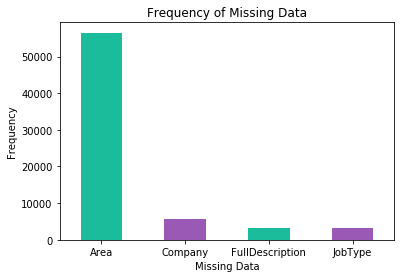

In [20]:
#Check missing data and visualise them in a corresponding chart.
null_count = df.isnull().sum().sort_values(ascending=False)
null_count = null_count[null_count > 0]
null_count.plot(kind="bar", color=['#1abc9c', '#9b59b6'])
plt.xticks(rotation=0,horizontalalignment="center")
plt.title("Frequency of Missing Data")
plt.xlabel("Missing Data")
plt.ylabel("Frequency")
plt.show()

# May want to tweak graph appearence.

In [21]:
# Part 2 - Data Analysis and Interpretation

# AverageSalary ranges:
# Create subsets to leverage
df_averageSal = df.groupby('AverageSalary').count()
df_averageSal['AverageSalary'] = df_averageSal.index
df_averageSal['Count'] = df_averageSal['Id']
df_averageSal

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Count
AverageSalary,,,,,,,,,,,,,,,
15.0,27606,27606,26254,27606,27606,17552,27606,27606,27606,27019,27606,27606,27025,15.0,27606
35.0,12441,12441,11872,12441,12441,7570,12441,12441,12441,12214,12441,12441,12216,35.0,12441
45.0,17708,17708,16474,17708,17708,10810,17708,17708,17708,17423,17708,17708,17426,45.0,17708
55.0,12559,12559,11894,12559,12559,8191,12559,12559,12559,12274,12559,12559,12282,55.0,12559
65.0,14108,14108,13464,14108,14108,8882,14108,14108,14108,13871,14108,14108,13890,65.0,14108
75.0,12932,12932,12546,12932,12932,7954,12932,12932,12932,12618,12932,12932,12621,75.0,12932
90.0,12582,12582,12265,12582,12582,7481,12582,12582,12582,12314,12582,12582,12317,90.0,12582
110.0,13062,13062,12815,13062,13062,8109,13062,13062,13062,12778,13062,13062,12779,110.0,13062
135.0,10651,10651,10500,10651,10651,6919,10651,10651,10651,10431,10651,10651,10431,135.0,10651


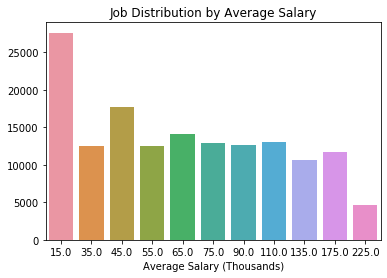

In [22]:
# AverageSalary plot
barChart = sns.barplot(x='AverageSalary', y='Count', data=df_averageSal)
plt.title("Job Distribution by Average Salary")
plt.xlabel("Average Salary (Thousands)")
plt.ylabel("")
plt.show()

In [23]:
# Job posts by Job Type pie-chart:
df_typePie = df.groupby('JobType').count()
df_typePie['JobType'] = df_typePie.index
df_typePie['Count'] = df_typePie['Id']
df_typePie = df_typePie.sort_values(by=['Count'], ascending=False)


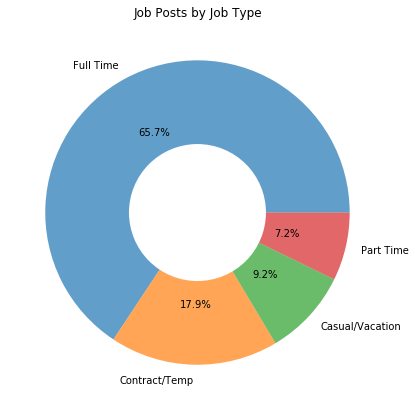

In [24]:
# Chart
fig, ax = plt.subplots(figsize=(7,7)) 
ax.pie(df_typePie['Count'], labels=df_typePie['JobType'], wedgeprops={'alpha':0.7}, autopct='%1.1f%%')
ax.set_title('Job Posts by Job Type', loc='center')

# add centre circle to make it a donut
centre_circle2 = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
ax.add_patch(centre_circle2)
plt.show()


In [25]:
# Job sectors and number of jobs of each horizontal chart:
df_jobSec = df.groupby('Classification').count()
df_jobSec['Classification'] = df_jobSec.index
df_jobSec['Count'] = df_jobSec['Id']
df_jobSec.sort_values(by=['Count'], ascending=False)



,Id,Title,Company,Date,Location,Area,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Classification,Count
Classification,,,,,,,,,,,,,,,
Information & Communication Technology,16661,16661,16390,16661,16661,11812,16661,16661,16086,16661,16661,16087,16661,Information & Communication Technology,16661
Trades & Services,14125,14125,12937,14125,14125,7610,14125,14125,13903,14125,14125,13904,14125,Trades & Services,14125
Healthcare & Medical,12515,12515,12016,12515,12515,5913,12515,12515,12400,12515,12515,12403,12515,Healthcare & Medical,12515
Hospitality & Tourism,11818,11818,11332,11818,11818,7363,11818,11818,11549,11818,11818,11553,11818,Hospitality & Tourism,11818
"Manufacturing, Transport & Logistics",9608,9608,8873,9608,9608,6593,9608,9608,9408,9608,9608,9410,9608,"Manufacturing, Transport & Logistics",9608
Administration & Office Support,7636,7636,7264,7636,7636,5262,7636,7636,7373,7636,7636,7373,7636,Administration & Office Support,7636
Accounting,7075,7075,6847,7075,7075,5594,7075,7075,6925,7075,7075,6925,7075,Accounting,7075
Education & Training,7033,7033,6845,7033,7033,4467,7033,7033,6796,7033,7033,6800,7033,Education & Training,7033
Retail & Consumer Products,6496,6496,6242,6496,6496,4100,6496,6496,6323,6496,6496,6328,6496,Retail & Consumer Products,6496


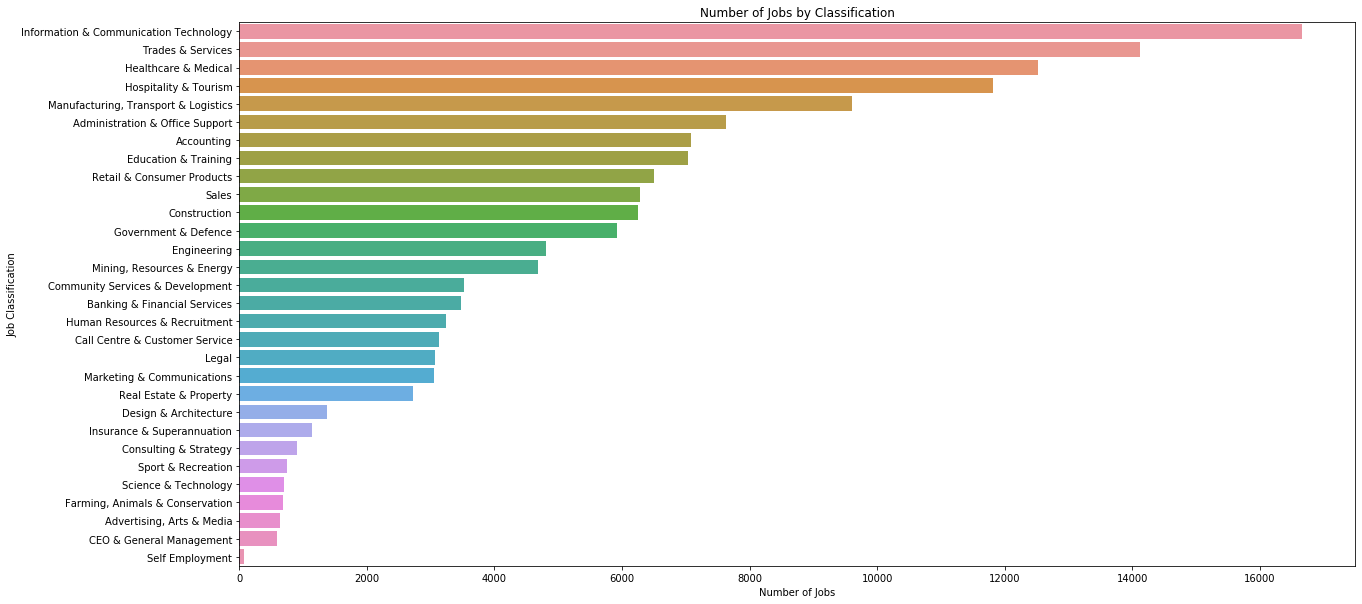

In [26]:
# Chart
plt.figure(figsize=(20,10))
barChart = sns.barplot(x='Count', y='Classification', data=df_jobSec.sort_values(by=['Count'], ascending=False))
plt.title("Number of Jobs by Classification")
plt.xlabel("Number of Jobs")
plt.ylabel("Job Classification")
plt.show()

# Adjust size.

In [28]:
# Favourite location, job classification market shart pie chart:
df_marketShare = df[df["Location"] == "Gold Coast"]
df_marketShare = df_marketShare.groupby('Classification').count()
df_marketShare['Classification'] = df_marketShare.index
df_marketShare['Count'] = df_marketShare['Id']
df_marketShare = df_marketShare.sort_values(by=['Count'], ascending=False)

df_marketShareTop = df_marketShare[:15].copy()
new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Count' : [df_marketShare["Count"][15:].sum()]
})
df_marketShareTop = pd.concat([df_marketShareTop, new_row],sort=False)
df_marketShareTop

,Id,Title,Company,Date,Location,Area,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Classification,Count
Hospitality & Tourism,467.0,467.0,443.0,467.0,467.0,0.0,467.0,467.0,462.0,467.0,467.0,462.0,467.0,Hospitality & Tourism,467
Trades & Services,363.0,363.0,326.0,363.0,363.0,0.0,363.0,363.0,356.0,363.0,363.0,356.0,363.0,Trades & Services,363
Healthcare & Medical,339.0,339.0,324.0,339.0,339.0,0.0,339.0,339.0,337.0,339.0,339.0,337.0,339.0,Healthcare & Medical,339
Retail & Consumer Products,180.0,180.0,170.0,180.0,180.0,0.0,180.0,180.0,171.0,180.0,180.0,171.0,180.0,Retail & Consumer Products,180
"Manufacturing, Transport & Logistics",176.0,176.0,155.0,176.0,176.0,0.0,176.0,176.0,169.0,176.0,176.0,169.0,176.0,"Manufacturing, Transport & Logistics",176
Administration & Office Support,150.0,150.0,135.0,150.0,150.0,0.0,150.0,150.0,142.0,150.0,150.0,142.0,150.0,Administration & Office Support,150
Education & Training,131.0,131.0,126.0,131.0,131.0,0.0,131.0,131.0,129.0,131.0,131.0,129.0,131.0,Education & Training,131
Sales,128.0,128.0,114.0,128.0,128.0,0.0,128.0,128.0,127.0,128.0,128.0,127.0,128.0,Sales,128
Construction,96.0,96.0,89.0,96.0,96.0,0.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,Construction,96
Information & Communication Technology,86.0,86.0,86.0,86.0,86.0,0.0,86.0,86.0,83.0,86.0,86.0,83.0,86.0,Information & Communication Technology,86


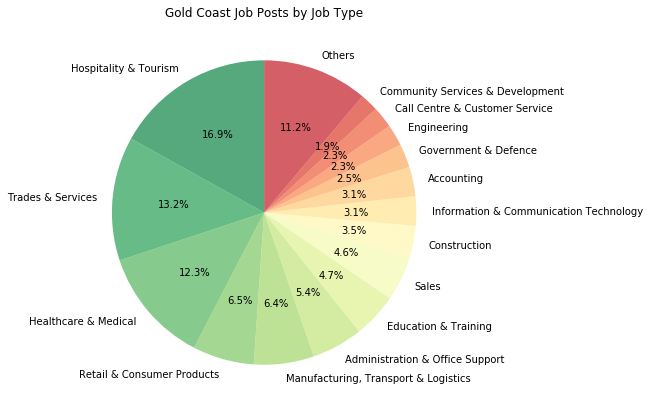

In [29]:
# Chart
fig, ax = plt.subplots(figsize=(7,7)) 
ax.pie(df_marketShareTop['Count'], labels=df_marketShareTop['Classification'], wedgeprops={'alpha':0.7}, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("RdYlGn_r", len(df_marketShareTop)))
ax.set_title('Gold Coast Job Posts by Job Type', loc='center')

plt.show()

# Needs to be exploded, gather smaller slices in to an "Other" slice.

In [30]:
# Salary distribution for top 30 cities for the number of job postings box plot
df_SalDist = df.groupby('Location').count()
df_SalDist['Location'] = df_SalDist.index
df_SalDist['Count'] = df_SalDist['Id']
df_SalDist = df_SalDist.sort_values(by=['Count'], ascending=False)
df_SalDist

loc30 = df_SalDist['Location']
list30 = list(loc30[0:30])
# Need to figure out how to use this to shape the df down to 30.
# Or to pull the top 30 from location_count earlier.

Text(0.5, 0, 'Location')

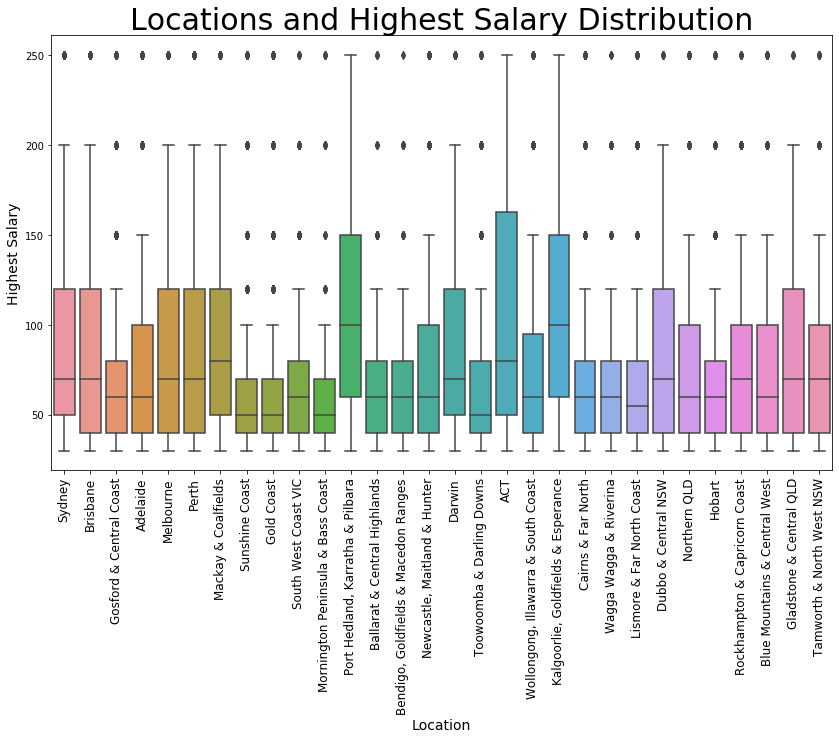

In [31]:
# Chart
df_boxplot = df[df.Location.isin(list30)]
# Got to thirty, lost the ordering...

plt.figure(figsize=(14,8))
box_plt_high = sns.boxplot(x='Location',y='HighestSalary',data=df_boxplot)
box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=12)
plt.title('Locations and Highest Salary Distribution',size=30)
plt.ylabel('Highest Salary',fontsize=14)
plt.xlabel('Location',fontsize=14)